In [1]:
!pip install roboflow


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 89.9/89.9 kB 4.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.8/66.8 kB 5.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.9/49.9 MB 16.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 72.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.2/4.2 MB 134.5 MB/s eta 0:00:00
  Attempting uninstall: opencv-python-headless
    Found existing installation: opencv-python-headless 4.12.0.88
    Uninstalling opencv-python-headless-4.12.0.88:
      Successfully uninstalled opencv-python-headless-4.12.0.88
  Attempting uninstall: idna
    Found existing installation: idna 3.11
    Uninstalling idna-3.11:
      Successfully uninstalled idna-3.11


In [3]:
from google.colab import files
uploaded = files.upload()


Saving Aquarium Object Detection Dataset.zip to Aquarium Object Detection Dataset.zip


In [5]:
import zipfile
import io

with zipfile.ZipFile(io.BytesIO(uploaded['Aquarium Object Detection Dataset.zip']), 'r') as zip_ref:
    zip_ref.extractall('/content/fish_dataset')


In [6]:
!pip install ultralytics


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 24.1 MB/s eta 0:00:00


In [ ]:
# train 

from ultralytics import YOLO

# Load YOLOv11
model = YOLO("yolo11n.pt")

# Path to data.yaml inside the dataset
yaml_path = "/content/fish_dataset/data.yaml"

results = model.train(
    data=yaml_path,
    epochs=10,
    imgsz=640,
    batch=16,

    # Custom Techniques
    lr0=0.001,          # custom learning rate
    mosaic=1.0,         # strong augmentation
    fliplr=0.5,         # horizontal flip
)


Ultralytics 8.3.235 🚀 Python-3.12.12 torch-2.9.0+cu126 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=16, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, compile=False, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=/content/fish_dataset/data.yaml, degrees=0.0, deterministic=True, device=None, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=10, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=640, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.001, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=yolo11n.pt, momentum=0.937, mosaic=1.0, multi_scale=False, name=train3, nbs=64, nms=False, opset=None, optimize=False, optimizer=auto, overlap_mask=True, patience=100, perspective=0.0, plots=True, p

In [10]:
test_path = "/content/fish_dataset/test/images"

model.predict(
    source=test_path,
    imgsz=640,
    conf=0.25,
    save=True,   # save predictions
)



image 1/63 /content/fish_dataset/test/images/IMG_2289_jpeg_jpg.rf.fe2a7a149e7b11f2313f5a7b30386e85.jpg: 640x480 1 penguin, 1 puffin, 50.3ms
image 2/63 /content/fish_dataset/test/images/IMG_2301_jpeg_jpg.rf.2c19ae5efbd1f8611b5578125f001695.jpg: 640x480 21 penguins, 8.0ms
image 3/63 /content/fish_dataset/test/images/IMG_2319_jpeg_jpg.rf.6e20bf97d17b74a8948aa48776c40454.jpg: 640x480 9 penguins, 7.7ms
image 4/63 /content/fish_dataset/test/images/IMG_2347_jpeg_jpg.rf.7c71ac4b9301eb358cd4a832844dedcb.jpg: 640x480 1 penguin, 8.6ms
image 5/63 /content/fish_dataset/test/images/IMG_2354_jpeg_jpg.rf.396e872c7fb0a95e911806986995ee7a.jpg: 640x480 3 penguins, 7.6ms
image 6/63 /content/fish_dataset/test/images/IMG_2371_jpeg_jpg.rf.54505f60b6706da151c164188c305849.jpg: 640x480 3 fishs, 7.8ms
image 7/63 /content/fish_dataset/test/images/IMG_2379_jpeg_jpg.rf.7dc3160c937072d26d4624c6c48e904d.jpg: 640x480 1 fish, 7.6ms
image 8/63 /content/fish_dataset/test/images/IMG_2380_jpeg_jpg.rf.a23809682eb1466c1136

[ultralytics.engine.results.Results object with attributes:
 
 boxes: ultralytics.engine.results.Boxes object
 keypoints: None
 masks: None
 names: {0: 'fish', 1: 'jellyfish', 2: 'penguin', 3: 'puffin', 4: 'shark', 5: 'starfish', 6: 'stingray'}
 obb: None
 orig_img: array([[[235, 233, 193],
         [234, 232, 192],
         [231, 228, 190],
         ...,
         [129, 124, 121],
         [128, 123, 122],
         [128, 123, 122]],
 
        [[232, 225, 186],
         [226, 221, 182],
         [221, 215, 178],
         ...,
         [131, 126, 123],
         [130, 125, 124],
         [130, 125, 124]],
 
        [[235, 221, 185],
         [225, 213, 177],
         [213, 201, 167],
         ...,
         [128, 123, 120],
         [128, 123, 120],
         [128, 123, 120]],
 
        ...,
 
        [[  1,   2,   0],
         [  1,   2,   0],
         [  1,   2,   0],
         ...,
         [ 35,  22,   8],
         [ 35,  22,   8],
         [ 35,  22,   8]],
 
        [[  1,   2,   0],
 

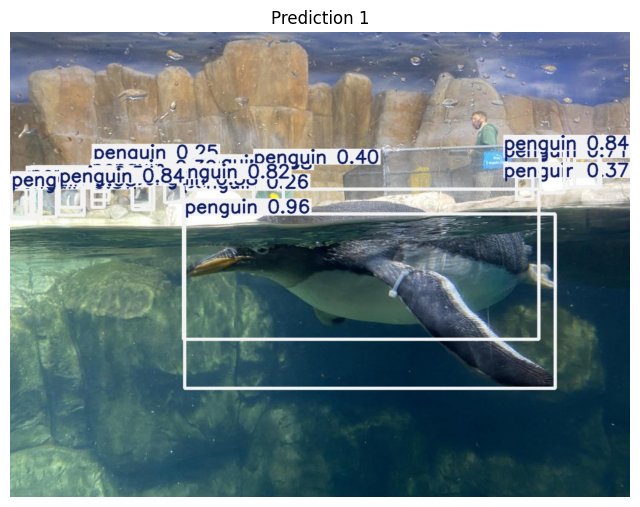

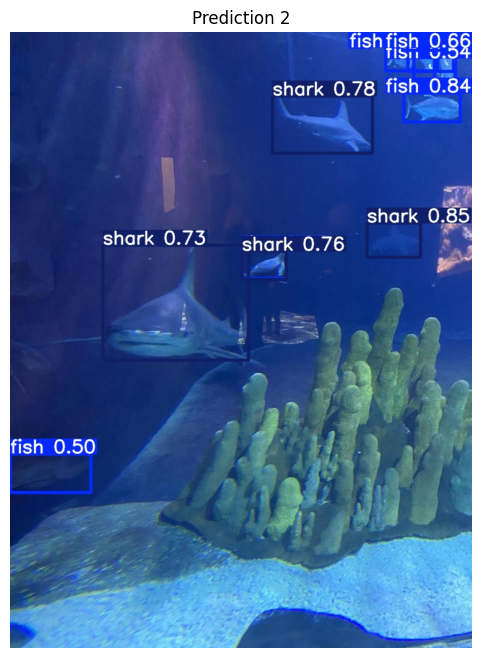

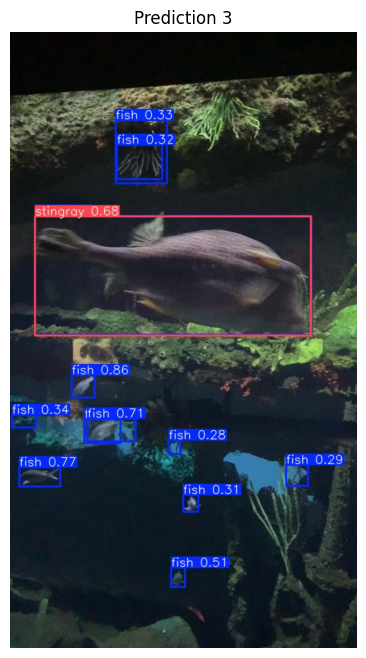

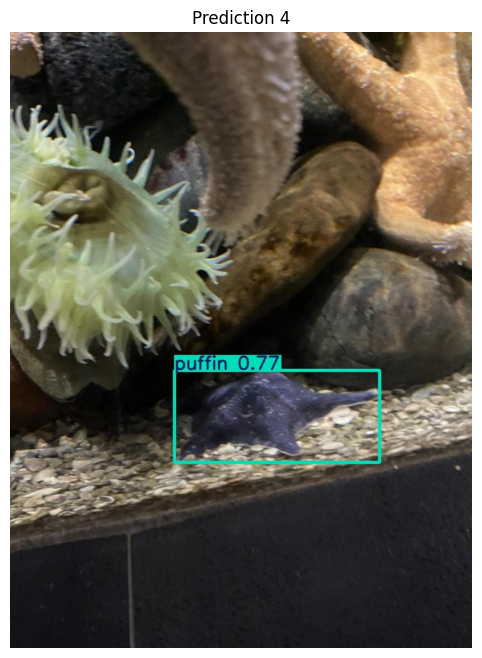

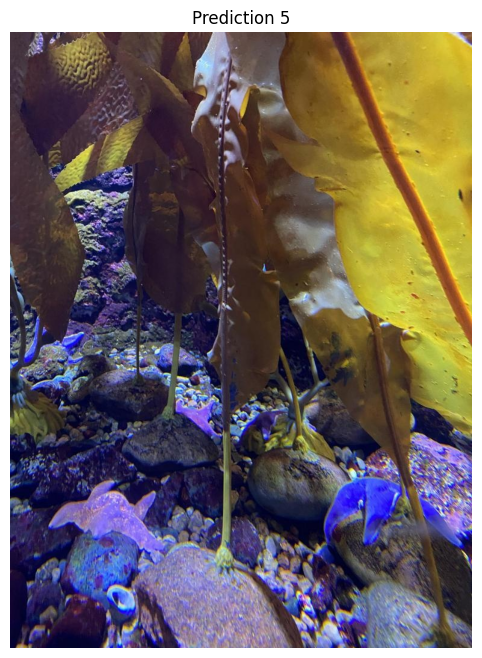

In [11]:
import os
import random
import matplotlib.pyplot as plt

results_path = '/content/runs/detect/predict'
image_files = [os.path.join(results_path, f) for f in os.listdir(results_path) if f.endswith(('.jpg', '.png'))]

random_images = random.sample(image_files, min(5, len(image_files)))

for i, img_path in enumerate(random_images):
    img = plt.imread(img_path)
    plt.figure(figsize=(8, 8))
    plt.imshow(img)
    plt.axis('off')
    plt.title(f"Prediction {i+1}")
    plt.show()


In [12]:
metrics = model.val(data=yaml_path)

print("Results saved at:", metrics.save_dir)


Ultralytics 8.3.235 🚀 Python-3.12.12 torch-2.9.0+cu126 CUDA:0 (Tesla T4, 15095MiB)
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 2408.8±793.7 MB/s, size: 97.4 KB)
val: Scanning /content/fish_dataset/valid/labels.cache... 127 images, 0 backgrounds, 0 corrupt: 100% ━━━━━━━━━━━━ 127/127 297.3Kit/s 0.0s
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% ━━━━━━━━━━━━ 8/8 2.0it/s 3.9s
                   all        127        909      0.763      0.573      0.655      0.394
                  fish         63        459      0.765      0.566      0.722      0.387
             jellyfish          9        155      0.803      0.865      0.888       0.49
               penguin         17        104      0.571      0.606      0.563      0.243
                puffin         15         74      0.706       0.27      0.359      0.184
                 shark         28         57      0.723      0.544      0.608      0.355
              starfish         17   

In [14]:
import time
import numpy as np
import os

test_path = "/content/fish_dataset/test/images"
image_files = [os.path.join(test_path, f) for f in os.listdir(test_path) if f.endswith(('.jpg','.png','.jpeg'))]

times = []

for img in image_files:
    start = time.time()
    model.predict(img, imgsz=640, conf=0.25, verbose=False)
    times.append(time.time() - start)

print(f"Total Images: {len(image_files)}")
print(f"Total Time: {np.sum(times):.4f} sec")
print(f"Average Time per Image: {np.mean(times):.4f} sec")


Total Images: 63
Total Time: 1.3227 sec
Average Time per Image: 0.0210 sec


Ultralytics 8.3.235 🚀 Python-3.12.12 torch-2.9.0+cu126 CUDA:0 (Tesla T4, 15095MiB)
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 2192.1±299.2 MB/s, size: 120.4 KB)
val: Scanning /content/fish_dataset/valid/labels.cache... 127 images, 0 backgrounds, 0 corrupt: 100% ━━━━━━━━━━━━ 127/127 18.2Kit/s 0.0s
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% ━━━━━━━━━━━━ 8/8 1.7it/s 4.8s
                   all        127        909      0.763      0.573      0.655      0.394
                  fish         63        459      0.765      0.566      0.722      0.387
             jellyfish          9        155      0.803      0.865      0.888       0.49
               penguin         17        104      0.571      0.606      0.563      0.243
                puffin         15         74      0.706       0.27      0.359      0.184
                 shark         28         57      0.723      0.544      0.608      0.355
              starfish         17   

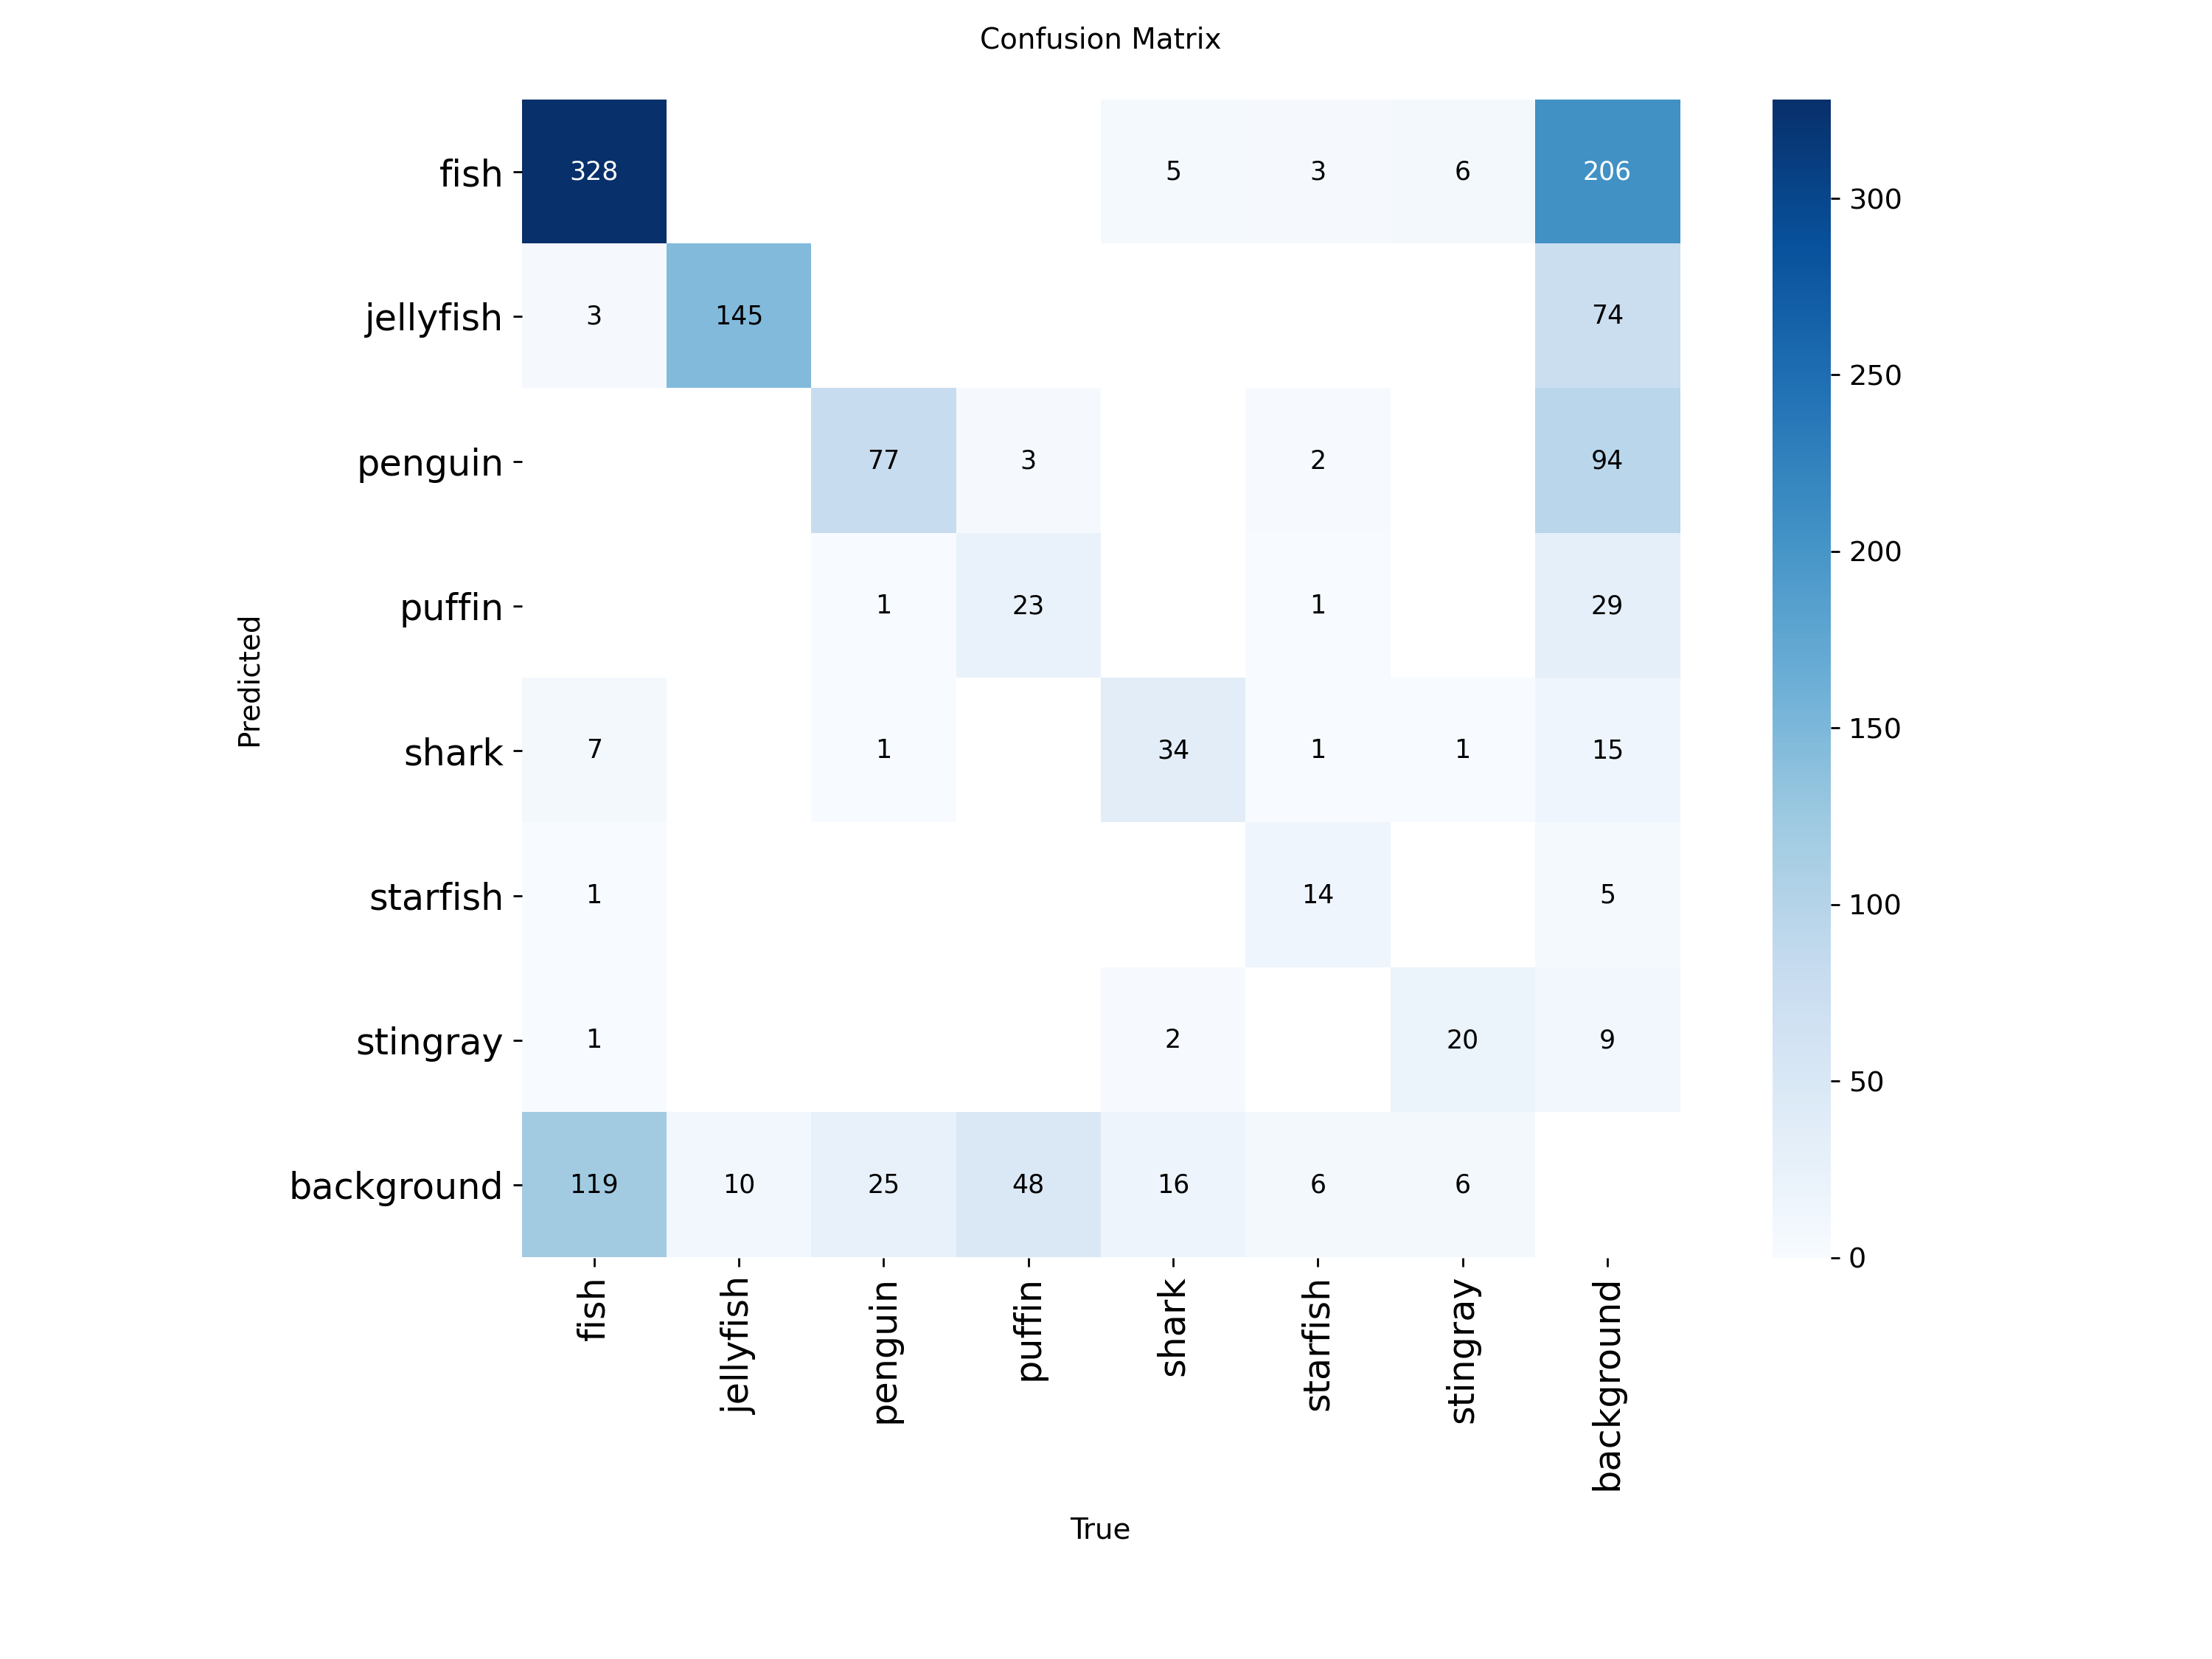

No PR_curve.png found.
No F1_curve.png found.
No P_curve.png found.
No R_curve.png found.

📌 mAP / Box Precision Curve:


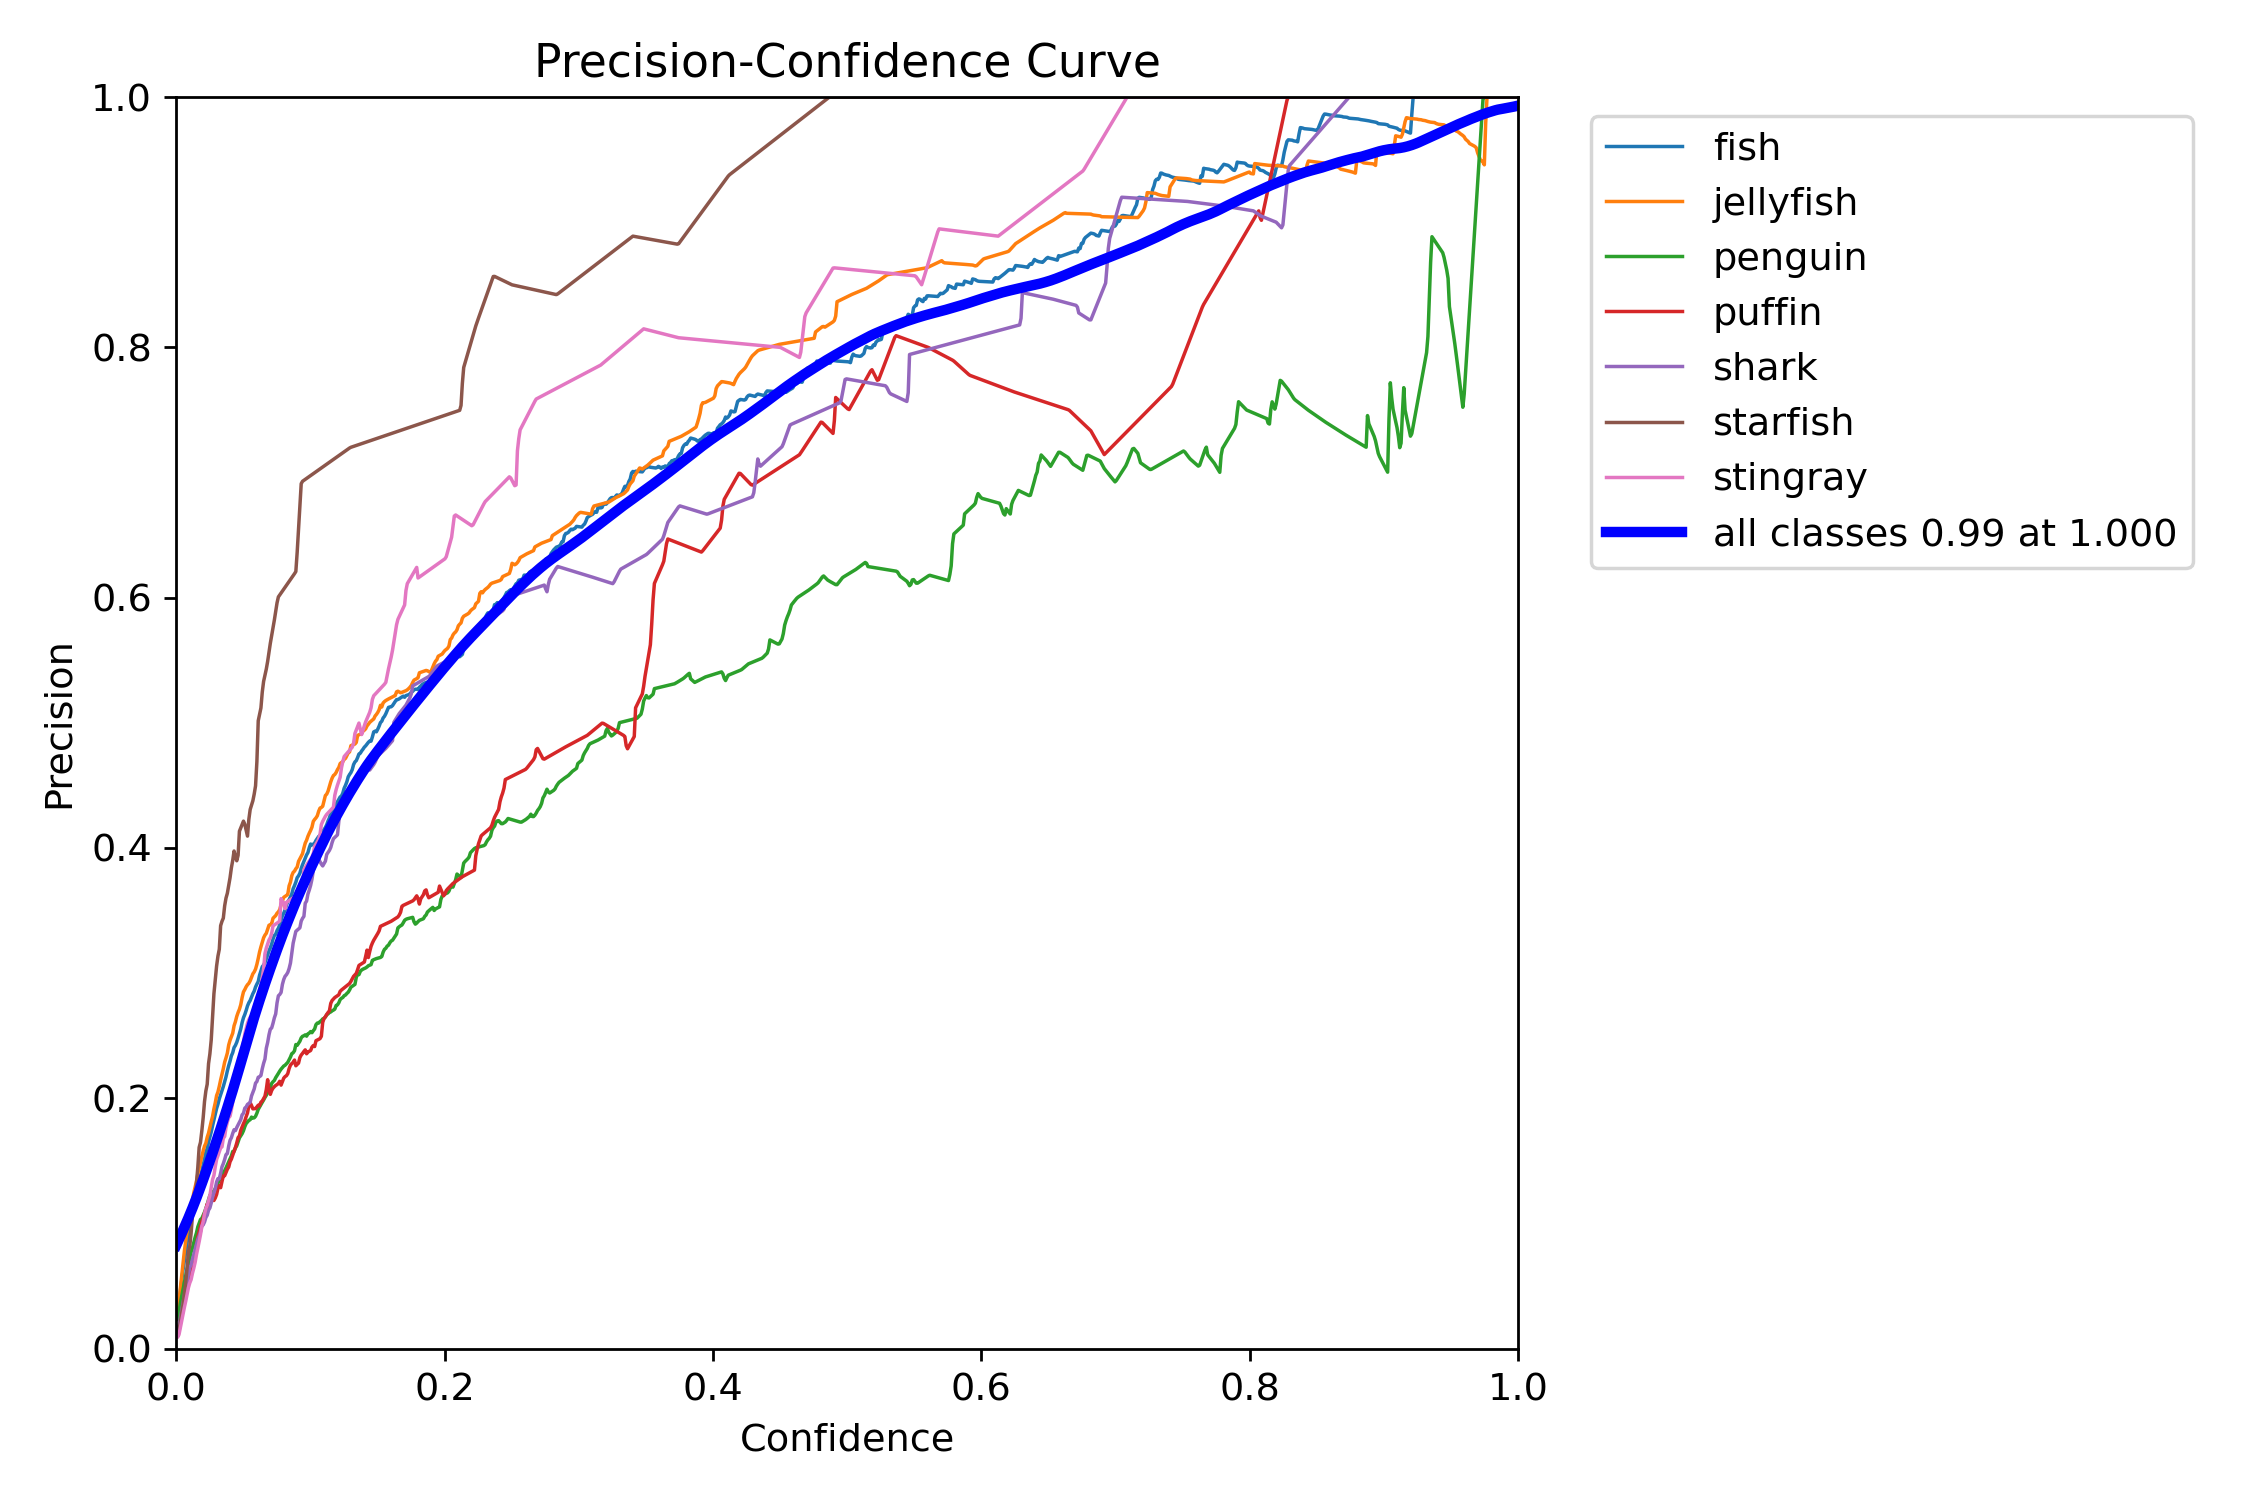

In [15]:
from IPython.display import Image, display
import os

# YOLO evaluation
metrics = model.val(data=yaml_path)

results_dir = metrics.save_dir
print("📂 Evaluation results saved in:", results_dir)

# CONFUSION MATRIX
cm_path = os.path.join(results_dir, "confusion_matrix.png")
if os.path.exists(cm_path):
    print("\n📌 Confusion Matrix:")
    display(Image(filename=cm_path))
else:
    print("No confusion_matrix.png found.")

# AP CURVE (BoxP)
boxp_curve = os.path.join(results_dir, "BoxP_curve.png")
if os.path.exists(boxp_curve):
    print("\n📌 mAP / Box Precision Curve:")
    display(Image(filename=boxp_curve))
else:
    print("No BoxP_curve.png found.")



📌 results Curves:


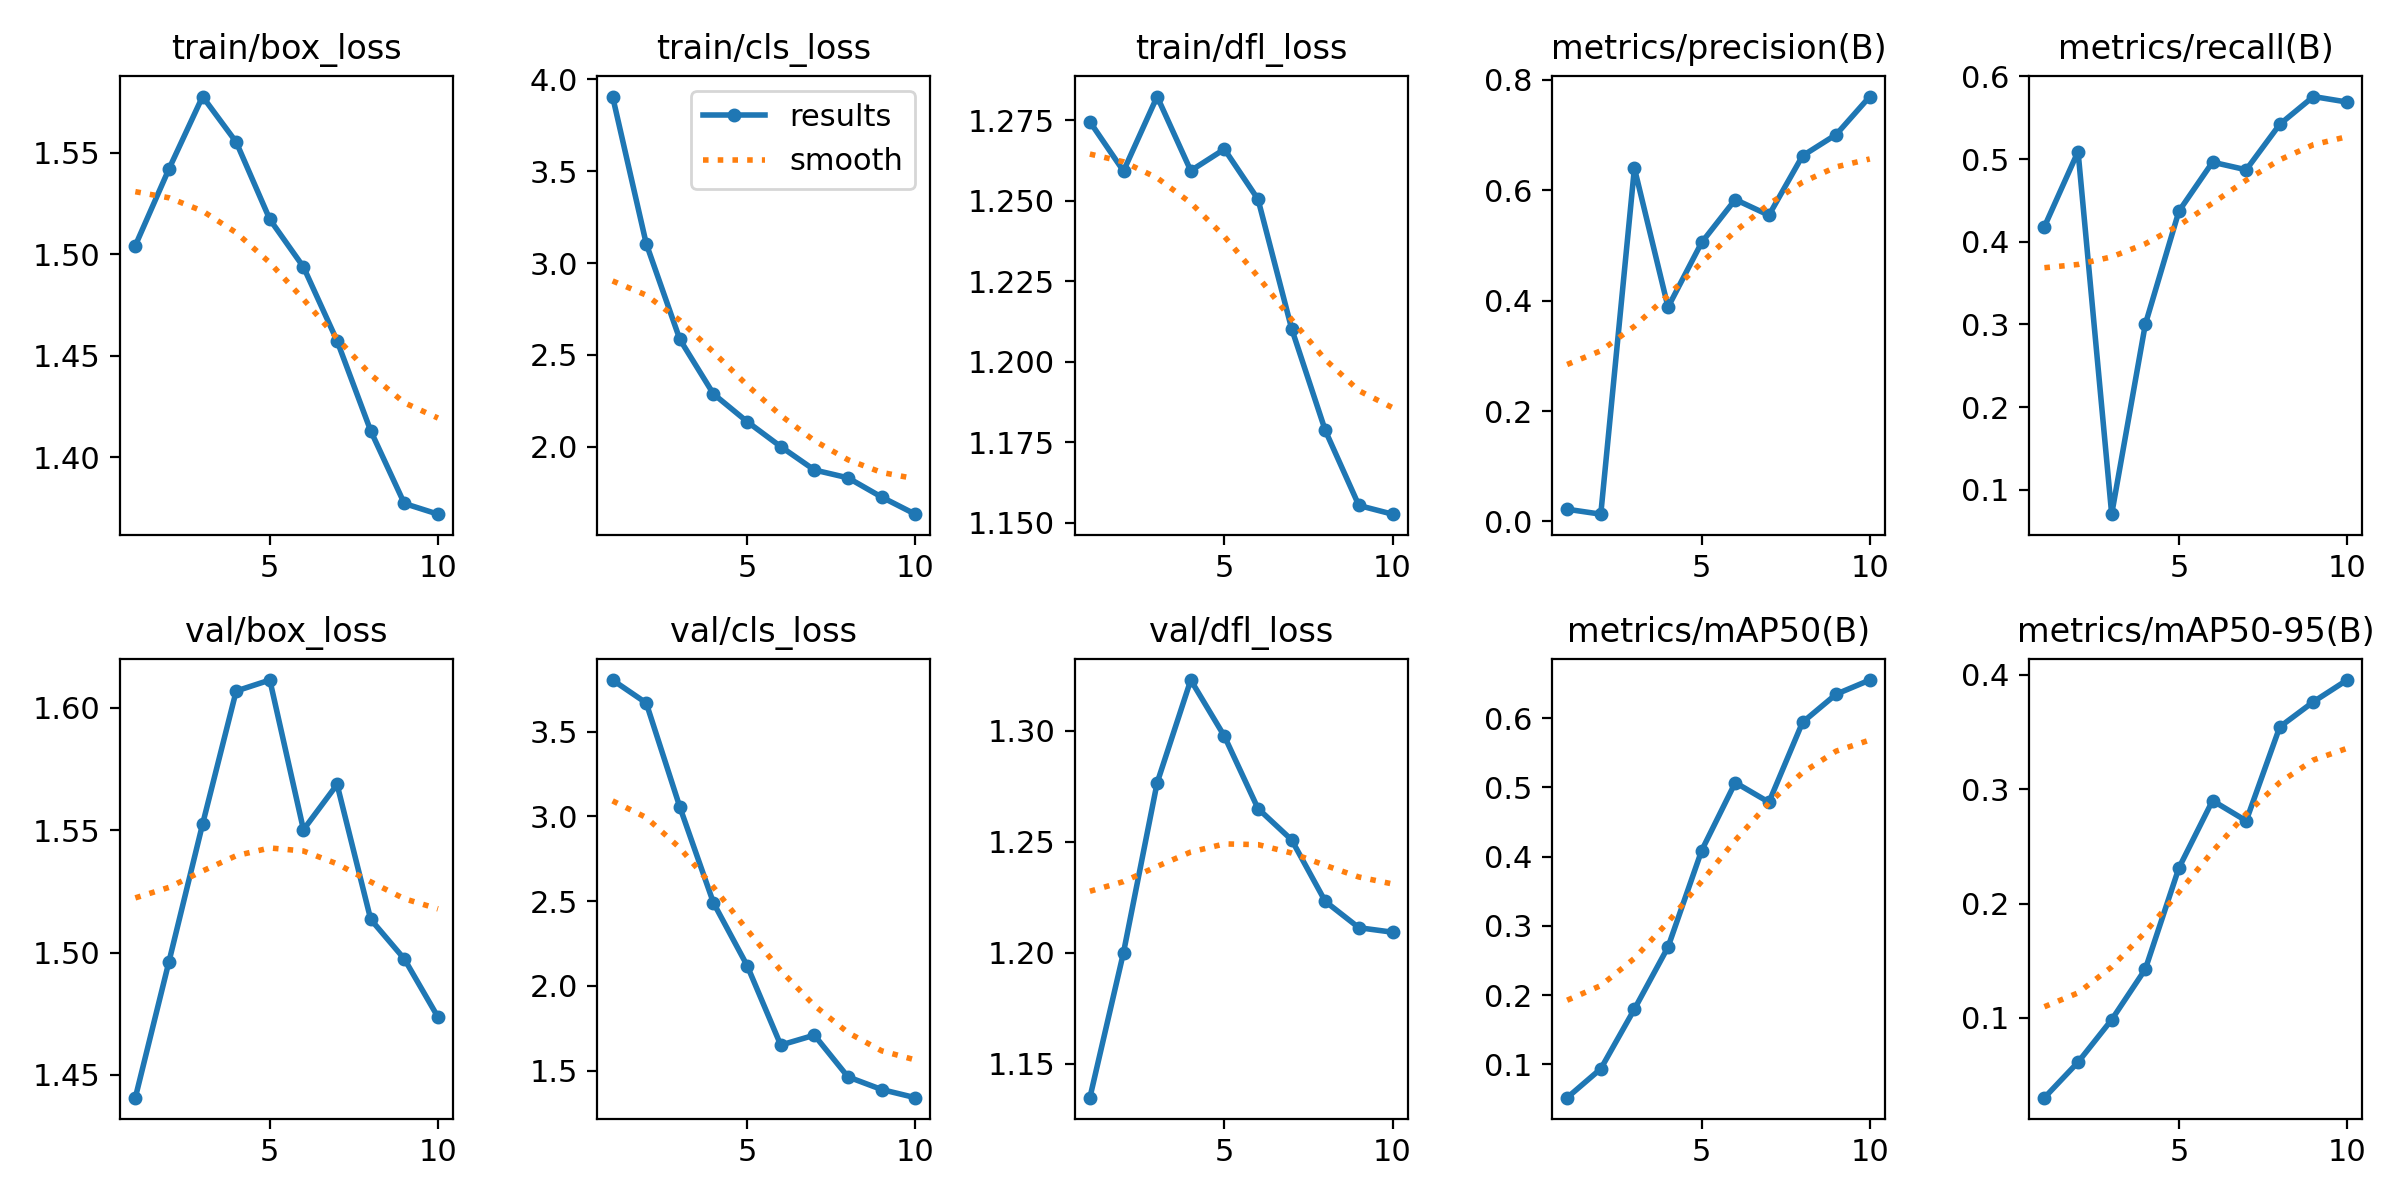

In [16]:
# results Curves
f1_path = os.path.join("/content/runs/detect/train3/results.png")
if os.path.exists(f1_path):
    print("\n📌 results Curves:")
    display(Image(filename=f1_path))
else:
    print("No_results_curves.png found.")